In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy.stats import mannwhitneyu
%matplotlib inline

In [175]:
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [176]:
data

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
5,CH,36.0,6,4.0,6.0,7.0,3.0,8.0,7.0,4.0,2.0,NaN,2.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0


In [77]:
data.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

## Trust by Country by Year

In [135]:
ch_2012 = data[(data['cntry']=='CH') & (data['year']==6)]
ch_2014 = data[(data['cntry']=='CH') & (data['year']==7)]
cz_2012 = data[(data['cntry']=='CZ') & (data['year']==6)]
cz_2014 = data[(data['cntry']=='CZ') & (data['year']==7)]
de_2012 = data[(data['cntry']=='DE') & (data['year']==6)]
de_2014 = data[(data['cntry']=='DE') & (data['year']==7)]
es_2012 = data[(data['cntry']=='ES') & (data['year']==6)]
es_2014 = data[(data['cntry']=='ES') & (data['year']==7)]
no_2012 = data[(data['cntry']=='NO') & (data['year']==6)]
no_2014 = data[(data['cntry']=='NO') & (data['year']==7)]
se_2012 = data[(data['cntry']=='SE') & (data['year']==6)]
se_2014 = data[(data['cntry']=='SE') & (data['year']==7)]

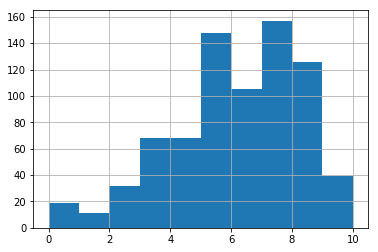

In [81]:
ch_2012.ppltrst.hist()

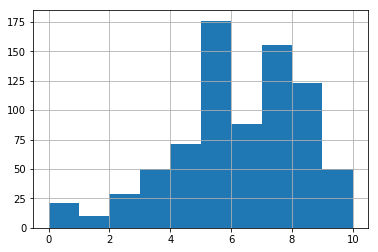

In [82]:
ch_2014.ppltrst.hist()

In [98]:
a= ch_2012['ppltrst']
b=ch_2014['ppltrst']
stats.ttest_rel(a, b)
#Don't reject Null Hypothesis

Ttest_relResult(statistic=-0.65868517567257368, pvalue=0.51029435113011345)

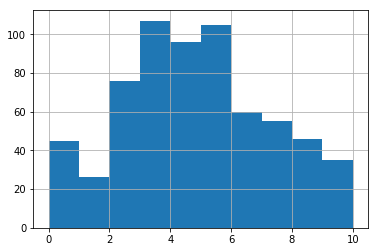

In [90]:
cz_2012.ppltrst.hist()

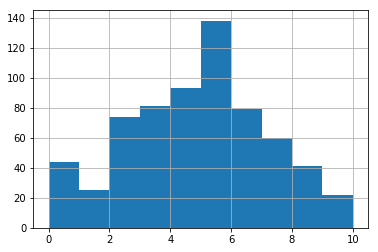

In [91]:
cz_2014.ppltrst.hist()

In [126]:
c= cz_2012['ppltrst'].fillna(0)
d= cz_2014['ppltrst'].fillna(0)
stats.ttest_rel(c, d)
#Don't reject Null Hypothesis

Ttest_relResult(statistic=-0.75265598832868663, pvalue=0.45192624809863913)

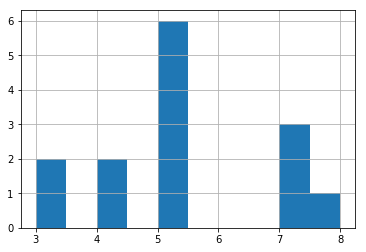

In [108]:
de_2012.ppltrst.hist()

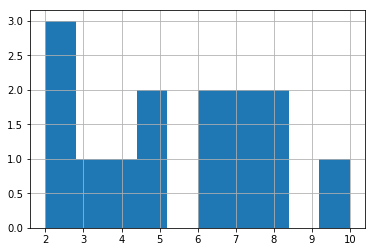

In [109]:
de_2014.ppltrst.hist()

In [116]:
stats.kruskal(
    de_2012['ppltrst'],
    de_2014['ppltrst'])
#Krsukal test used due to non-parametric data
#don't reject Null Hypothesis

KruskalResult(statistic=0.03493591039585809, pvalue=0.85173001912501989)

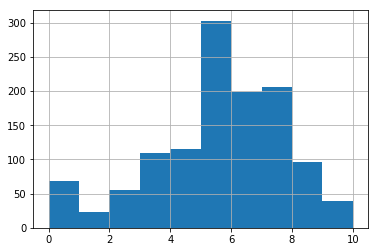

In [117]:
es_2012.ppltrst.hist()

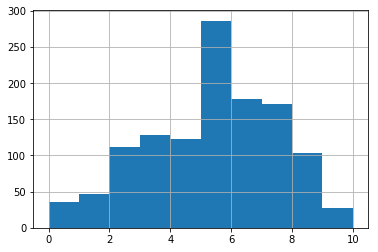

In [118]:
es_2014.ppltrst.hist()

In [128]:
e= es_2012['ppltrst'].fillna(0)
f= es_2014['ppltrst'].fillna(0)
stats.ttest_rel(e, f)
#Reject Null hypothesis

Ttest_relResult(statistic=2.568723866973941, pvalue=0.010326232284012218)

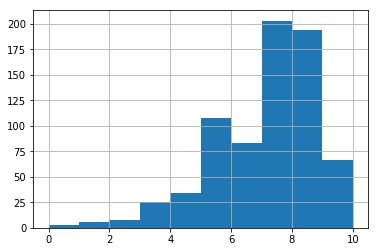

In [129]:
no_2012.ppltrst.hist()

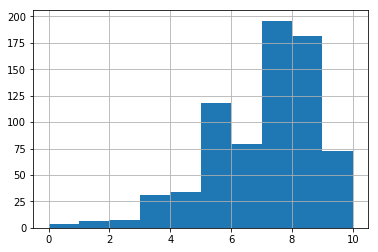

In [130]:
no_2014.ppltrst.hist()

In [132]:
g=no_2012['ppltrst']
h=no_2014['ppltrst']
mannwhitneyu(g, h)
#Do not reject Null

MannwhitneyuResult(statistic=263282.0, pvalue=0.31077646343559118)

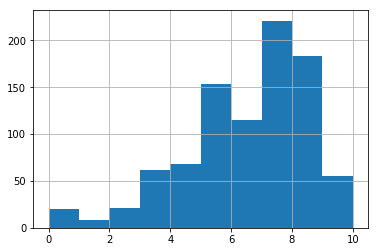

In [136]:
se_2012.ppltrst.hist()

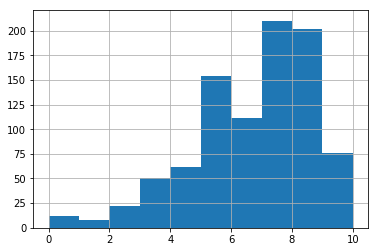

In [137]:
se_2014.ppltrst.hist()

In [230]:
i=se_2012['ppltrst'].fillna(0)
j=se_2014['ppltrst'].fillna(0)
stats.ttest_rel(i, j)
#Reject Null

Ttest_relResult(statistic=-2.2042507796416118, pvalue=0.027757203812996307)

We can only safely conclude a different in trust factors for 2 countries(Spain, Sweden) that correlates to the 2 year time difference.

## Happiness by Country by Year

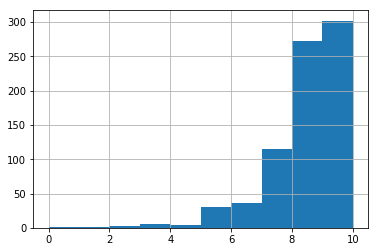

In [141]:
ch_2012.happy.hist()

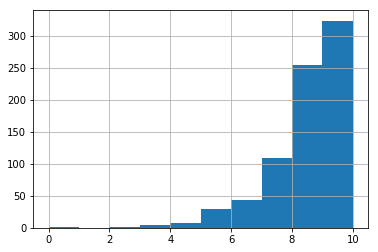

In [142]:
ch_2014.happy.hist()

In [143]:
chhap2012=ch_2012['happy']
chhap2014=ch_2014['happy']
mannwhitneyu(chhap2012, chhap2014)
#Cannot Reject Null

MannwhitneyuResult(statistic=295920.5, pvalue=0.36896331466909604)

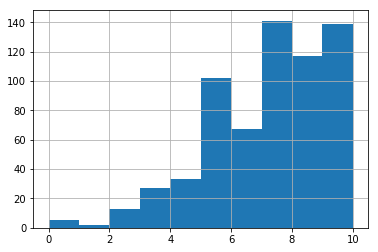

In [144]:
cz_2012.happy.hist()

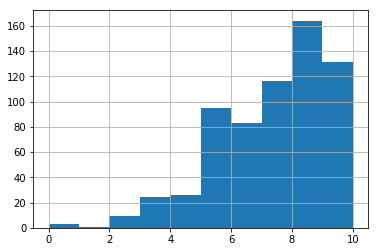

In [145]:
cz_2014.happy.hist()

In [146]:
czhap2012=cz_2012['happy']
czhap2014=cz_2014['happy']
mannwhitneyu(czhap2012, czhap2014)
#Cannot Reject Null

MannwhitneyuResult(statistic=210494.0, pvalue=0.18949051013930929)

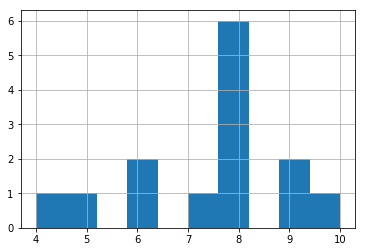

In [147]:
de_2012.happy.hist()

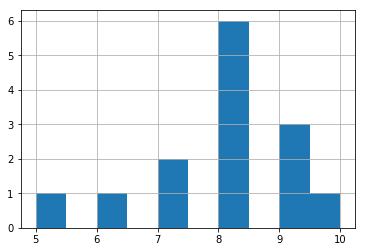

In [148]:
de_2014.happy.hist()

In [149]:
stats.kruskal(
    de_2012['happy'],
    de_2014['happy'])
#Cannot Reject Null

KruskalResult(statistic=0.39056749122656015, pvalue=0.53200125505866203)

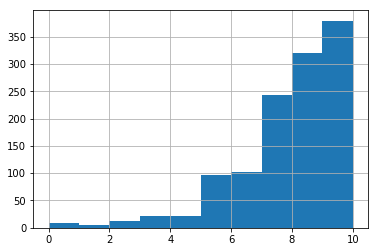

In [150]:
es_2012.happy.hist()

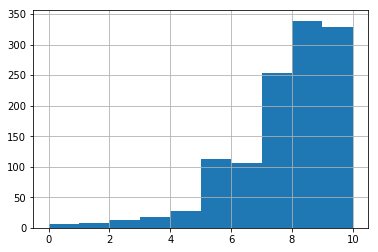

In [151]:
es_2014.happy.hist()

In [152]:
eshap2012=es_2012['happy']
eshap2014=es_2014['happy']
mannwhitneyu(eshap2012, eshap2014)
#Can Reject Null

MannwhitneyuResult(statistic=701480.5, pvalue=0.021716318232211127)

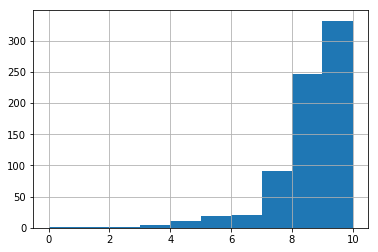

In [153]:
no_2012.happy.hist()

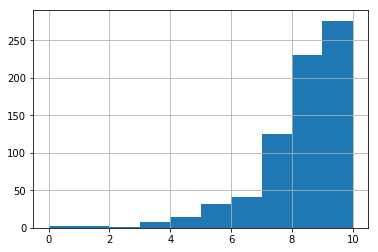

In [154]:
no_2014.happy.hist()

In [155]:
nohap2012=no_2012['happy']
nohap2014=no_2014['happy']
mannwhitneyu(nohap2012, nohap2014)
#Can Reject Null

MannwhitneyuResult(statistic=231619.5, pvalue=2.7797876822756928e-06)

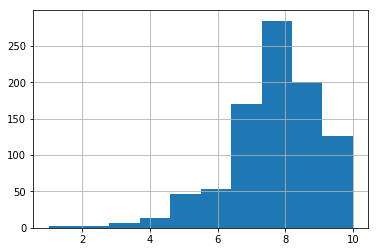

In [156]:
se_2012.happy.hist()

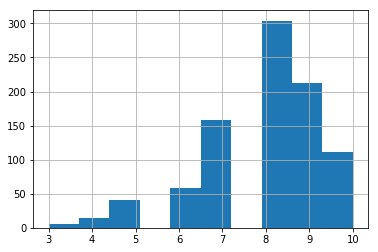

In [157]:
se_2014.happy.hist()

In [158]:
sehap2012=se_2012['happy']
sehap2014=se_2014['happy']
mannwhitneyu(sehap2012, sehap2014)
#Cannot Reject Null

MannwhitneyuResult(statistic=408890.5, pvalue=0.37922857251530234)

We can only safely conclude a different in happiness for 2 countries(Spain, Norway) that correlates to the 2 year time difference.

## TV Watching Between Men and Women

In [187]:
male= data[data.gndr == 1]
female=data[data.gndr==2]
male2012=male[male.year==6]
female2012=female[female.year==6]



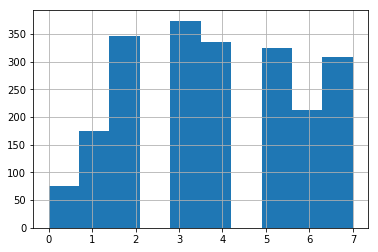

In [188]:
male2012.tvtot.hist()

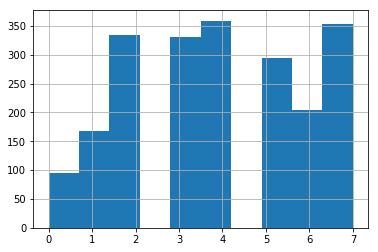

In [189]:
female2012.tvtot.hist()

In [202]:
import scipy
ab=male2012['tvtot'].fillna(0)
ac=female2012['tvtot'].fillna(0)
scipy.stats.ttest_ind(ac,ab,equal_var=False)
#Not a noticable difference between men and women.

Ttest_indResult(statistic=0.68766427998820601, pvalue=0.4917014042270873)

## Fairness - Single/Relationship

In [204]:
relationship= data[data.partner == 1]
single= data[data.partner == 2]
relationship2012=relationship[relationship.year==6]
single2012=single[single.year==6]


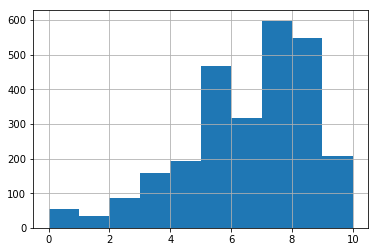

In [205]:
relationship2012.pplfair.hist()

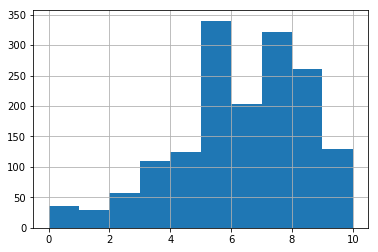

In [206]:
single2012.pplfair.hist()

In [211]:
xy=relationship2012['pplfair'].fillna(0)
xz=single2012['pplfair'].fillna(0)
scipy.stats.ttest_ind(xy,xz,equal_var=False)
#There is a noticable discrepancy between people who are single and who are in relationships and their visions of fairness.

Ttest_indResult(statistic=3.3188840322836244, pvalue=0.00091345001716641944)

## Social Gatherings by Country

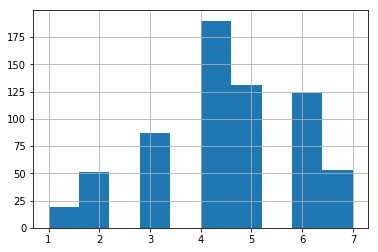

In [214]:
cz_2014.sclmeet.hist()

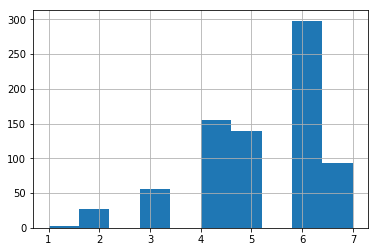

In [216]:
ch_2014.sclmeet.hist()

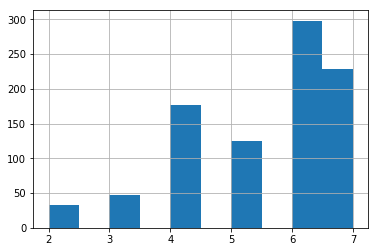

In [218]:
se_2014.sclmeet.hist()

In [220]:
x=cz_2014['sclmeet'].fillna(0)
y=ch_2014['sclmeet'].fillna(0)
z=se_2014['sclmeet'].fillna(0)

stats.kruskal(x, y, z)

KruskalResult(statistic=182.25797094422271, pvalue=2.6496253367665854e-40)

In [222]:
print(stats.ttest_ind(x, y))
print(stats.ttest_ind(x, z))
print(stats.ttest_ind(y, z))

Ttest_indResult(statistic=-9.7386977578025444, pvalue=9.61062986141258e-22)
Ttest_indResult(statistic=-13.654180976126403, pvalue=3.4786959094985072e-40)
Ttest_indResult(statistic=-4.1232362910083031, pvalue=3.9183247245496159e-05)


## Social Activities By Country By Age

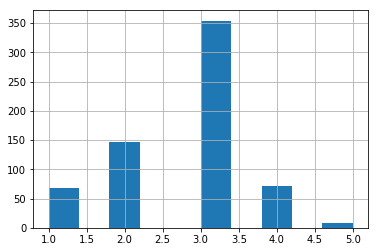

In [223]:
cz_2014.sclact.hist()

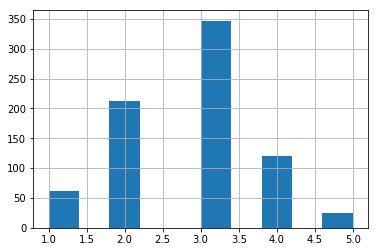

In [224]:
ch_2014.sclact.hist()

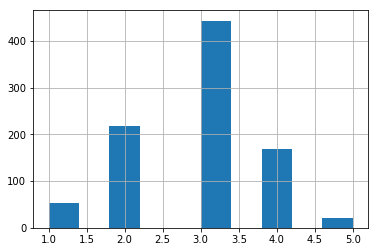

In [225]:
se_2014.sclact.hist()

In [227]:
a1=cz_2014['sclact'].fillna(0)
a2=ch_2014['sclact'].fillna(0)
a3=se_2014['sclact'].fillna(0)
stats.f_oneway(a1, a2, a3,)

F_onewayResult(statistic=9.2325907532697897, pvalue=0.00010141476416612951)

In [228]:
print(stats.ttest_ind(a1, a2))
print(stats.ttest_ind(a1, a3))
print(stats.ttest_ind(a2, a3))

Ttest_indResult(statistic=-1.6837704698654119, pvalue=0.092444439070268988)
Ttest_indResult(statistic=-4.3280644809205571, pvalue=1.5996491785460717e-05)
Ttest_indResult(statistic=-2.5465882135536582, pvalue=0.010966777562925859)
